In [1]:
from deepspeed.utils.zero_to_fp32 import get_fp32_state_dict_from_zero_checkpoint, convert_zero_checkpoint_to_fp32_state_dict
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from PIL import Image
import torch

[2023-11-22 10:49:13,099] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


2023-11-22 10:49:15.054125: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-22 10:49:15.054179: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-22 10:49:15.098530: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 10:49:15.939070: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-11-22 10:49:15.939196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [2]:
from cldm.model import load_state_dict, create_model

In [3]:
checkpoint_dir = '../../../models/checkpoints/fill50k-epoch=00-step= 8000.ckpt/checkpoint/mp_rank_00_model_states.pt'

In [4]:
state_dict = load_state_dict(checkpoint_dir)

Loaded state_dict from [../../../models/checkpoints/fill50k-epoch=00-step= 8000.ckpt/checkpoint/mp_rank_00_model_states.pt]


In [5]:
model = create_model('models/scldm_v15.yaml')

ExtendedControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, 

In [6]:
model.load_state_dict(state_dict['module'])

<All keys matched successfully>

In [7]:
import sys
import os
import cv2
import numpy as np
import torch
from PIL import Image
from pytorch_lightning import seed_everything
from tqdm import tqdm

from cldm.model import create_model, load_state_dict
from dataset.Fill50KDataset import Fill50KDataset
from inference import run_sampler
from share import *

logging improved.


In [8]:
dataset_path = "../../../../dataset/fill50k"
dataset = Fill50KDataset(dataset_path)
len(dataset)

50000

In [9]:
k = 42000
example = dataset[k]
prompt = example['txt']
hint = cv2.imread(dataset_path + "/" + dataset.data[k]['source'])

burly wood circle with hot pink background


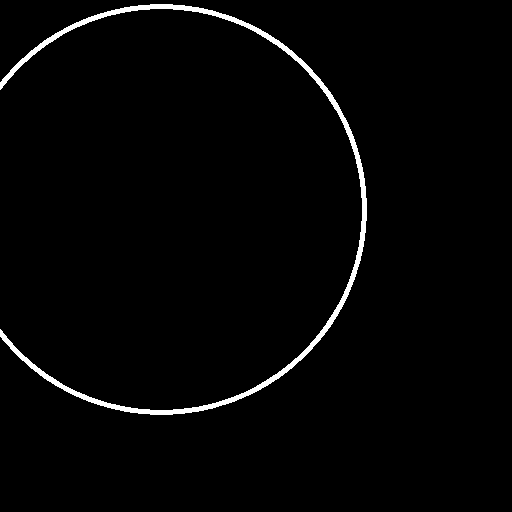

In [10]:
print(prompt)
Image.fromarray(cv2.cvtColor(hint, cv2.COLOR_BGR2RGB), "RGB")

In [11]:
model.cuda()
print("hi")

hi


In [12]:
results = run_sampler(model, hint, prompt, seed=42)

Seed set to 42


Data shape for DDIM sampling is (1, 4, 32, 32), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.59it/s]


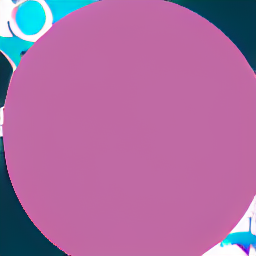

In [13]:
 Image.fromarray(results[0], "RGB")

In [14]:
len(results)

1